# Library needed

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Excel file needed
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [2]:
heart_df = pd.read_csv('heart_train.csv')

In [3]:
heart_df.describe(include= 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Attribute Information  
- Age: age of the patient [years]  
- Sex: sex of the patient [M: Male, F: Female]  
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
- RestingBP: resting blood pressure [mm Hg]  
- Cholesterol: serum cholesterol [mm/dl]  
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]  
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]  
- Oldpeak: oldpeak = ST [Numeric value measured in depression]  
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]  
- HeartDisease: output class [1: heart disease, 0: Normal]  

# Clean Dataset

In [5]:
# Create a copy of the Dataset
Heart_df_clean = heart_df.copy()

# Rename "#" to "ID" of Pokemon
Heart_df_clean.rename(columns = {'#': 'ID'}, inplace = True)

# Convert all Variable Names to UPPERCASE
Heart_df_clean.columns = Heart_df_clean.columns.str.upper()

# Remove all spaces and dots from Variable Names
Heart_df_clean.columns = Heart_df_clean.columns.str.replace(".","")
Heart_df_clean.columns = Heart_df_clean.columns.str.replace(" ","_")

# Print the Variable Information to check
Heart_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGE             918 non-null    int64  
 1   SEX             918 non-null    object 
 2   CHESTPAINTYPE   918 non-null    object 
 3   RESTINGBP       918 non-null    int64  
 4   CHOLESTEROL     918 non-null    int64  
 5   FASTINGBS       918 non-null    int64  
 6   RESTINGECG      918 non-null    object 
 7   MAXHR           918 non-null    int64  
 8   EXERCISEANGINA  918 non-null    object 
 9   OLDPEAK         918 non-null    float64
 10  ST_SLOPE        918 non-null    object 
 11  HEARTDISEASE    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


C:\Users\LCP\AppData\Local\Temp\ipykernel_17376\1996328438.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Heart_df_clean.columns = Heart_df_clean.columns.str.replace(".","")


In [6]:
# Numeric
heart_AGE = pd.DataFrame(Heart_df_clean['AGE'])
heart_RBP = pd.DataFrame(Heart_df_clean['RESTINGBP'])
heart_CLS = pd.DataFrame(Heart_df_clean['CHOLESTEROL'])
heart_MAXHR = pd.DataFrame(Heart_df_clean['MAXHR'])
heart_HD = pd.DataFrame(Heart_df_clean['HEARTDISEASE'])

#catogrical
heart_SEX = pd.DataFrame(Heart_df_clean['SEX'])
heart_EA = pd.DataFrame(Heart_df_clean['EXERCISEANGINA'])
heart_CPT = pd.DataFrame(Heart_df_clean['CHESTPAINTYPE'])


# Reconfig type

In [7]:
heartC_HD = heart_HD
heartC_HD.replace(to_replace=[1,0],value = ['Y','N'],inplace = True )

In [8]:
heartC_HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HEARTDISEASE  918 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


# Visualisation

<AxesSubplot:>

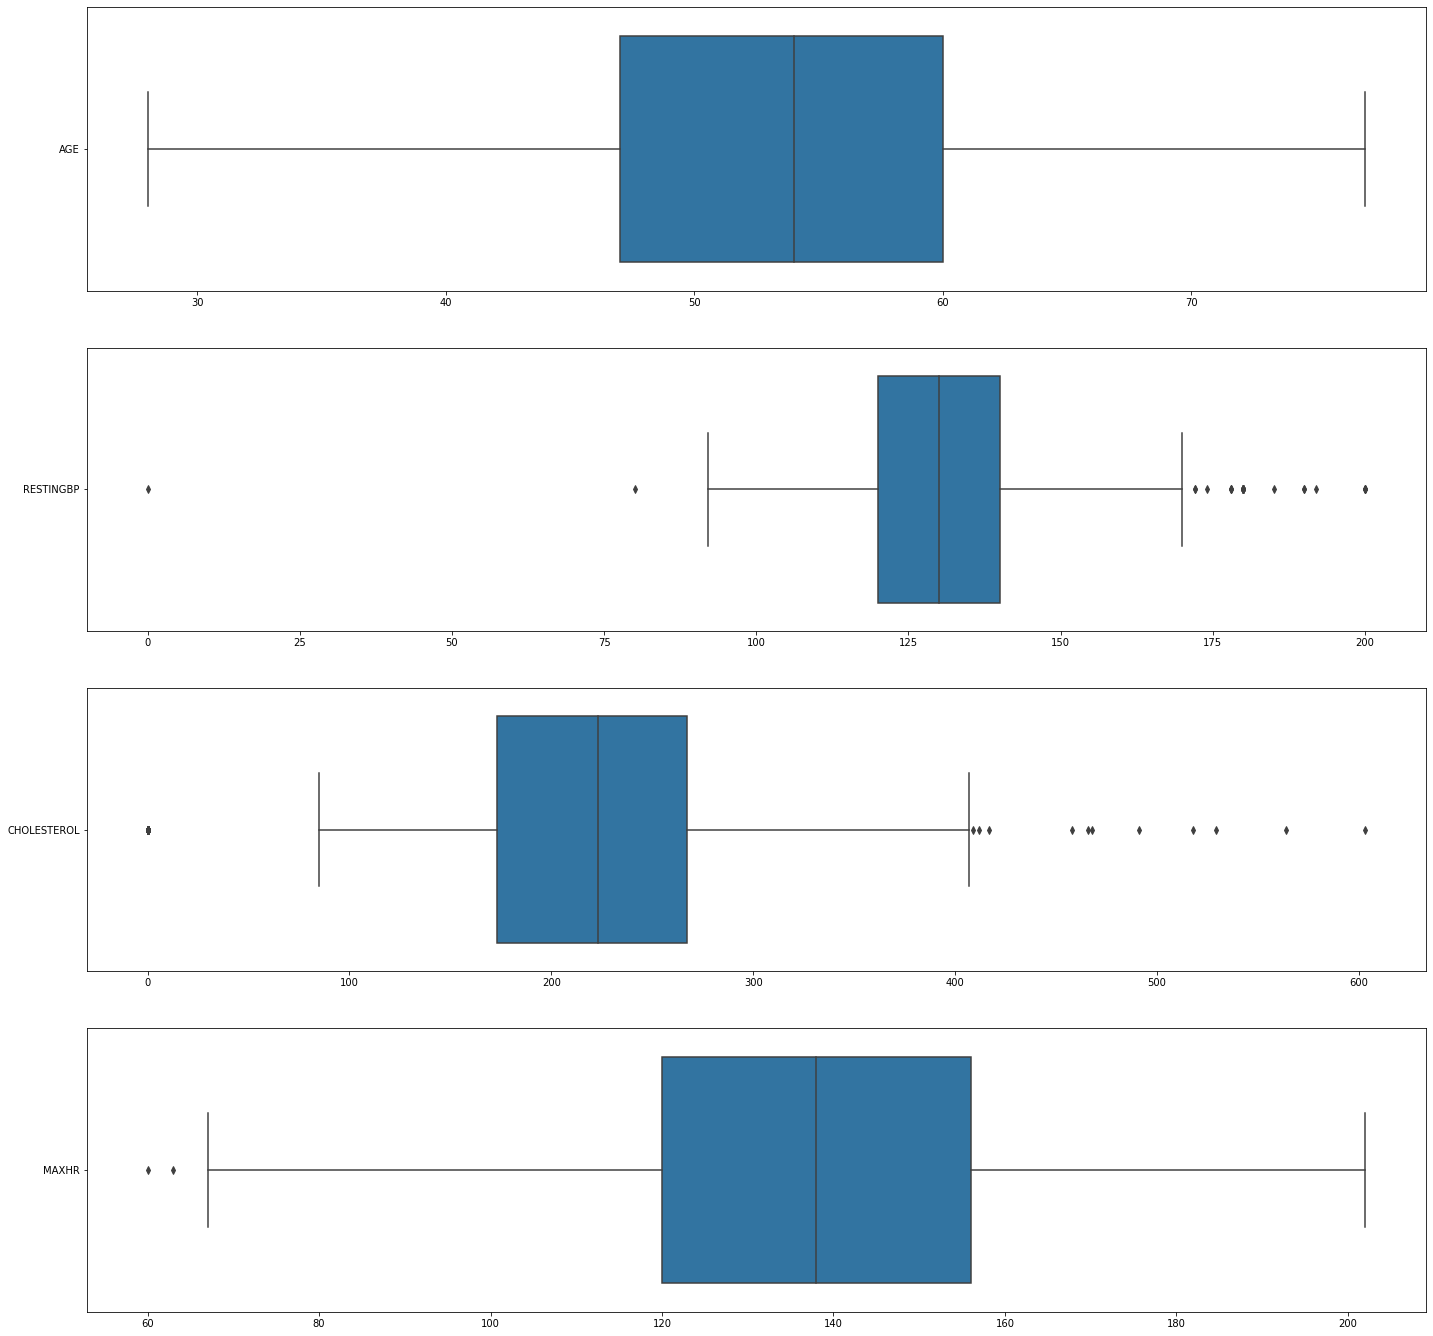

In [9]:
f1,ax1= plt.subplots(4,1,figsize =(24,24))
sb.boxplot(data = heart_AGE, orient ='h',ax=ax1[0])
sb.boxplot(data = heart_RBP, orient ='h',ax=ax1[1])
sb.boxplot(data = heart_CLS, orient ='h',ax=ax1[2])
sb.boxplot(data = heart_MAXHR, orient ='h',ax=ax1[3])


<AxesSubplot:xlabel='HEARTDISEASE', ylabel='count'>

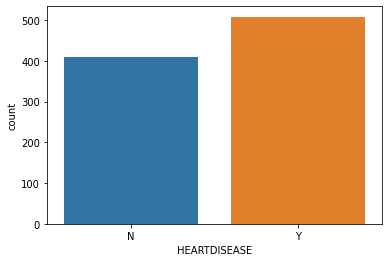

In [10]:
sb.countplot(x='HEARTDISEASE',data =heartC_HD,orient='h')

<AxesSubplot:xlabel='count', ylabel='SEX'>

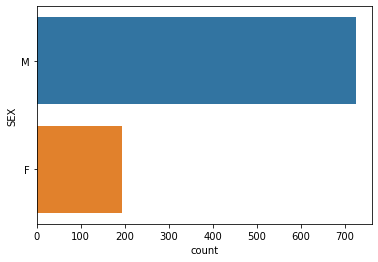

In [11]:
sb.countplot(y ='SEX',data = heart_SEX,orient ='v')

<AxesSubplot:xlabel='count', ylabel='EXERCISEANGINA'>

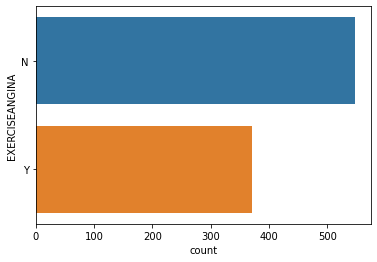

In [12]:
sb.countplot( y ='EXERCISEANGINA',data = heart_EA,orient='v')

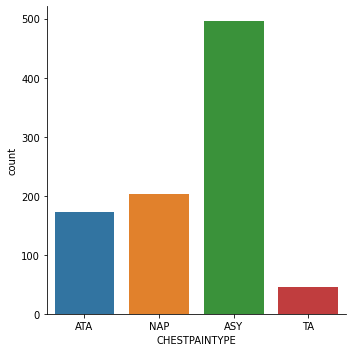

In [13]:
sb.catplot(x='CHESTPAINTYPE',data = heart_CPT,kind='count')

<AxesSubplot:>

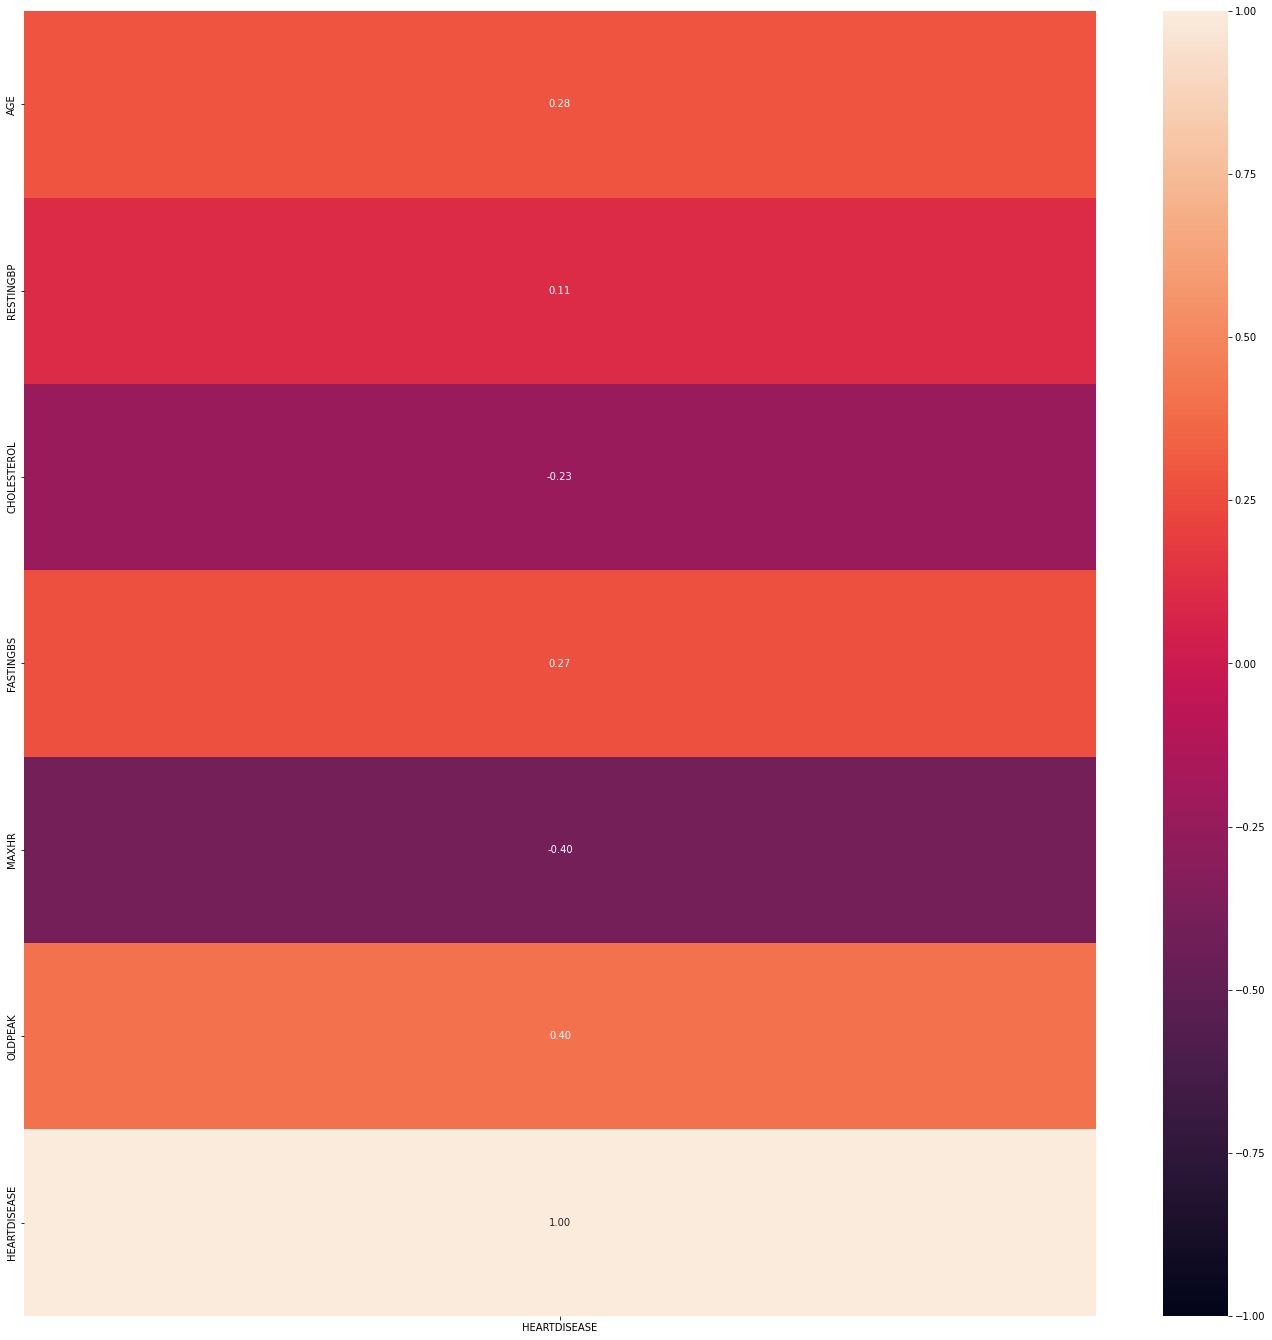

In [14]:
f3 = plt.figure(figsize =(24,24))
sb.heatmap(Heart_df_clean.corr()[['HEARTDISEASE']], vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [15]:
test1 = pd.concat([heartC_HD,heart_SEX],axis=1).reindex(heartC_HD.index)
test2 = pd.concat([heartC_HD,heart_EA],axis=1).reindex(heartC_HD.index)
test3 = pd.concat([heartC_HD,heart_CPT],axis=1).reindex(heartC_HD.index)

<AxesSubplot:xlabel='HEARTDISEASE', ylabel='count'>

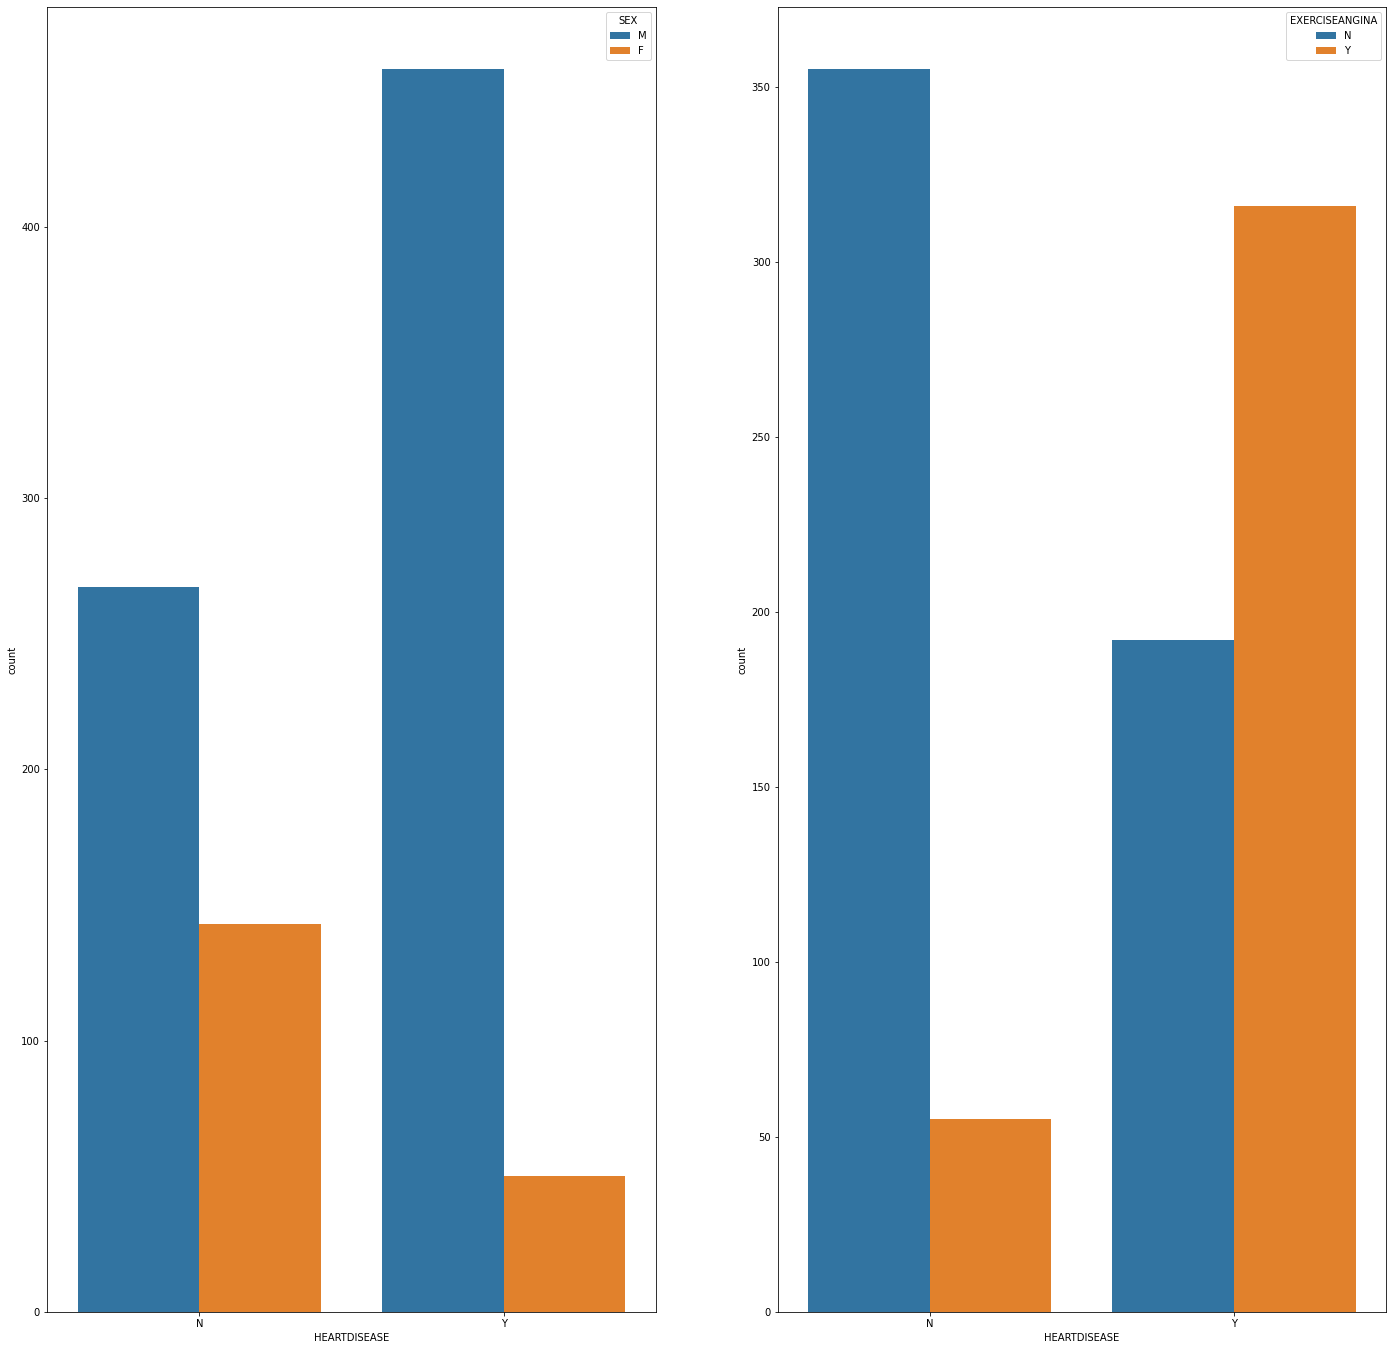

In [16]:
f4,ax2 =plt.subplots(1,2,figsize= (24,24))
sb.countplot(data =test1,x='HEARTDISEASE',hue='SEX',ax=ax2[0])
sb.countplot(data =test2,x='HEARTDISEASE',hue='EXERCISEANGINA',ax=ax2[1])

<AxesSubplot:xlabel='count', ylabel='CHESTPAINTYPE'>

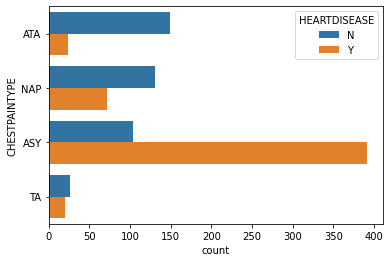

In [17]:
sb.countplot(data =test3,y='CHESTPAINTYPE',hue='HEARTDISEASE',orient='v')

In [18]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#-------------[model1,2]----------------------
from sklearn.tree import DecisionTreeClassifier
#-------------[model3,4]----------------------
from sklearn.ensemble import RandomForestClassifier
#-------------[model5,6]------------------------
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

In [19]:
Age3_train, Age3_test, HD3_train, HD3_test = train_test_split(heart_AGE,heartC_HD, test_size = 0.3,random_state=42)

In [28]:
X = pd.DataFrame(Heart_df_clean[['AGE','CHOLESTEROL','MAXHR','RESTINGBP']]) # Features
y = pd.DataFrame(Heart_df_clean['HEARTDISEASE']) # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [29]:
dectree4 = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                  max_depth = 4)       # set the maximum depth of each tree
dectree4.fit(X_train,y_train)

C:\Users\LCP\AppData\Local\Temp\ipykernel_17376\2654164371.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dectree4.fit(X_train,y_train)


RandomForestClassifier(max_depth=4)

Text(0.5, 1.0, 'Test Model 4')

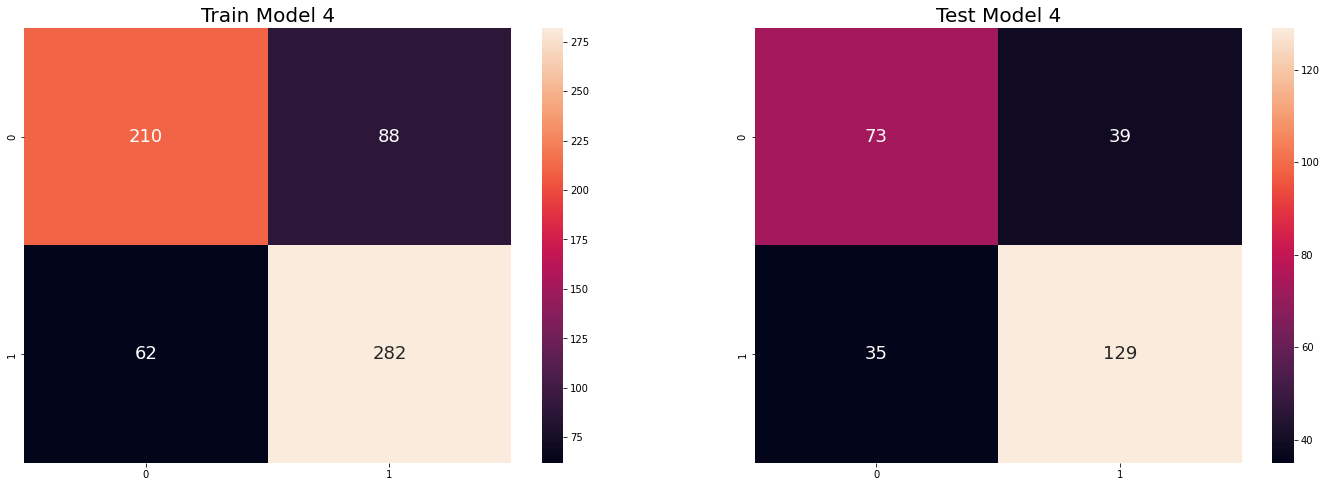

In [30]:
y_train_pred2 = dectree4.predict(X_train)
y_test_pred2 = dectree4.predict(X_test)
f10,ax6 = plt.subplots(1,2,figsize =(24,8))
sb.heatmap(confusion_matrix(y_train, y_train_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax6[0])
ax6[0].set_title("Train Model 4",fontsize = '20')
sb.heatmap(confusion_matrix(y_test, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18},ax=ax6[1])
ax6[1].set_title("Test Model 4",fontsize = '20')

In [31]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain4 = confusion_matrix(y_train, y_train_pred2)
tpTrain4 = cmTrain4[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain4 = cmTrain4[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain4 = cmTrain4[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain4 = cmTrain4[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Train :\t", (tpTrain4/(tpTrain4 + fnTrain4)))
print("TNR Train :\t", (tnTrain4/(tnTrain4 + fpTrain4)))
print()
print("FPR Train :\t", (fpTrain4/(tnTrain4 + fpTrain4)))
print("FNR Train :\t", (fnTrain4/(tpTrain4 + fnTrain4)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmtest4 = confusion_matrix(y_test, y_test_pred2)
tptest4 = cmtest4[1][1] # True Positives : Good (1) predicted Good (1)
fptest4 = cmtest4[0][1] # False Positives : Bad (0) predicted Good (1)
tntest4 = cmtest4[0][0] # True Negatives : Bad (0) predicted Bad (0)
fntest4 = cmtest4[1][0] # False Negatives : Good (1) predicted Bad (0)
print("TPR Test :\t", (tptest4/(tptest4 + fntest4)))
print("TNR Test :\t", (tntest4/(tntest4 + fptest4)))
print()
print("FPR Test :\t", (fptest4/(tntest4 + fptest4)))
print("FNR Test :\t", (fntest4/(tptest4 + fntest4)))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7663551401869159

TPR Train :	 0.8197674418604651
TNR Train :	 0.7046979865771812

FPR Train :	 0.2953020134228188
FNR Train :	 0.18023255813953487

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7318840579710145

TPR Test :	 0.7865853658536586
TNR Test :	 0.6517857142857143

FPR Test :	 0.3482142857142857
FNR Test :	 0.21341463414634146

